# Introduction
In this study, how the number of amphibian species changes with human effect was examined.

<font color = 'blue'>
Content:

1. [Load and Check Data](#1)
1. [Variable Description](#2)
    * [Variable Analysis](#3)
1. [Random Forest With One-Hot Encoding](#4) 
1. [Random Forest With Label Encoding](#5)


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
import tensorflow as tf
from tensorflow.python.data import Dataset
import keras
from keras.utils import to_categorical
from keras import models
from keras import layers
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

<a id = "1" ></a><br>
# Load and Check Data

In [3]:
df=pd.read_csv('../input/vericsv/veri.csv',delimiter=',')
df2 = df.copy()
df2.head()

,ID,Motorway,SR,NR,TR,VR,SUR1,SUR2,SUR3,UR,...,BR,MR,CR,Green frogs,Brown frogs,Common toad,Fire-bellied toad,Tree frog,Common newt,Great crested newt
0,1,A1,600,1,1,4,6,2,10,0,...,0,0,1,0,0,0,0,0,0,0
1,2,A1,700,1,5,1,10,6,10,3,...,1,0,1,0,1,1,0,0,1,0
2,3,A1,200,1,5,1,10,6,10,3,...,1,0,1,0,1,1,0,0,1,0
3,4,A1,300,1,5,0,6,10,2,3,...,0,0,1,0,0,1,0,0,0,0
4,5,A1,600,2,1,4,10,2,6,0,...,5,0,1,0,1,1,1,0,1,1


<a id = "2" ></a><br>
# Variable Description
1. ID: Integer value, not use in calculations
1. Motorway: Categorical value, not use in calculations
1. SR: Surface of water reservoir numeric [m2]
1. NR: Number of water reservoirs in habitat
1. TR: Type of water reservoirs:
   * a. reservoirs with natural features that are natural or anthropogenic water reservoirs
   * b. recently formed reservoirs
   * c. settling ponds
   * d. water reservoirs located near houses
   * e. technological water reservoirs
   * f. water reservoirs in allotment gardens
   * g. trenches
   * h. wet meadows, flood plains, marshes
   * i. river valleys
   * j. streams and very small watercourses
   
1. VR:Presence of vegetation within the reservoirs:
   * a. no vegetation
   * b. narrow patches at the edges
   * c. areas heavily overgrown
   * d. lush vegetation within the reservoir with some part devoid of vegetation
   * e. reservoirs completely overgrown with a disappearing water table
   
1. SUR1: Dominant types of land cover surrounding the water reservoir
1. SUR2: Second most dominant types of land cover surrounding the water reservoir
1. SUR3: Third most dominant types of land cover surrounding the water reservoir
   * a. forest areas (with meadows) and densely wooded areas
   * b. areas of wasteland and meadows
   * c. allotment gardens
   * d. parks and green areas
   * e. dense building development, industrial areas
   * f. dispersed habitation, orchards, gardens
   * g. river valleys
   * h. roads, streets
   * i. agricultural land
   
1. UR: Use of water reservoirs:
   * a. unused by man (very attractive for amphibians)
   * b. recreational and scenic (care work is performed)
   * c. used economically (often fish farming)
   * d. technological
   
1. FR: The presence of fishing:
   * a. lack of or occasional fishing
   * b. intense fishing
   * c. breeding reservoirs
   
1. OR: Percentage access from the edges of the reservoir to undeveloped areas
   * a. %25 lack of access or poor access
   * b. %25-%50 low access
   * c. %50-%75 medium access,
   * d. %75-%100 large access to terrestrial habitats 
   
1. RR: Minimum distance from the water reservoir to roads:
   * a. <50 m
   * b. 50-100 m
   * c. 100-200 m
   * d. 200-500 m
   * e. 500-1000 m
   * f. >1000 m
   
1. BR: Minimum distance to buildings:
   * a. <50 m
   * b. 50-100 m
   * c. 100-200 m
   * d. 200-500 m
   * e. 500-1000 m
   * f. >1000 m
   
1. MR: Maintenance status of the reservoir:
   * a. Clean
   * b. slightly littered
   * c. reservoirs heavily or very heavily littered
   
1. CR: Type of shore
   * a. Natural
   * b. Concrete
   
1. Green frogs: the presence of Green frogs
1. Brown frogs: the presence of Brown frogs
1. Common toad: the presence of Common toad
1. Fire-bellied toad: the presence of Fire-bellied toad
1. Tree frog: the presence of Tree frog
1. Common newt: the presence of Common newt
1. Great crested newt: the presence of Great crested newt

<a id="3" ></a><br>
# Variable Analysis
* Categorical Variable: Motorway, TR, VR, SUR, UR, FR, OR, RR, BR, MR, CR, Green frogs, Brown frogs, Common toad, Fire-bellied toad, Tree frog, Common newt, Great crested newt

* Numerical Variable: ID, SR, NR

In this section we can see the frequency of all categorical values.

In [4]:
def bar_plot(variable):
    # get feature
    var = df2[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize = (6,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

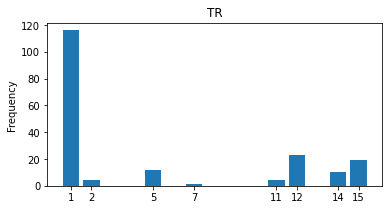

TR: 
 1     116
12     23
15     19
5      12
14     10
11      4
2       4
7       1
Name: TR, dtype: int64


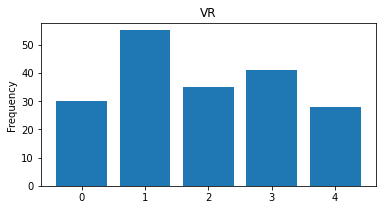

VR: 
 1    55
3    41
2    35
0    30
4    28
Name: VR, dtype: int64


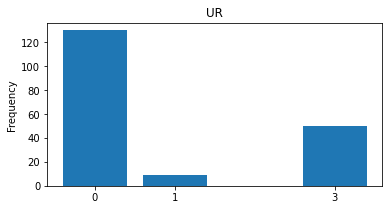

UR: 
 0    130
3     50
1      9
Name: UR, dtype: int64


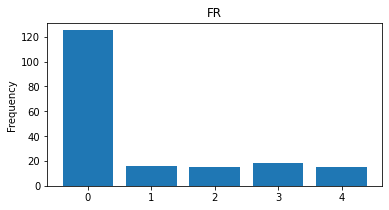

FR: 
 0    125
3     18
1     16
4     15
2     15
Name: FR, dtype: int64


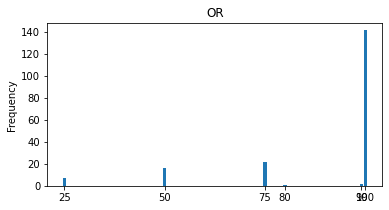

OR: 
 100    141
75      22
50      16
25       7
99       2
80       1
Name: OR, dtype: int64


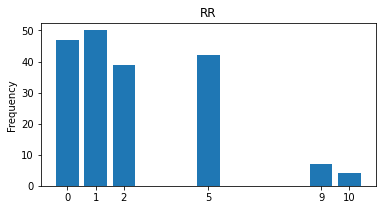

RR: 
 1     50
0     47
5     42
2     39
9      7
10     4
Name: RR, dtype: int64


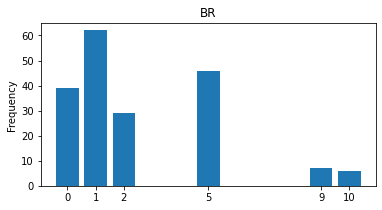

BR: 
 1     62
5     46
0     39
2     29
9      7
10     6
Name: BR, dtype: int64


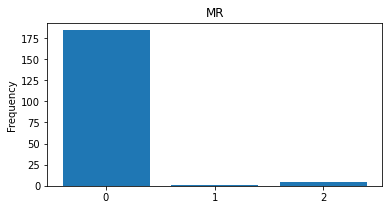

MR: 
 0    184
2      4
1      1
Name: MR, dtype: int64


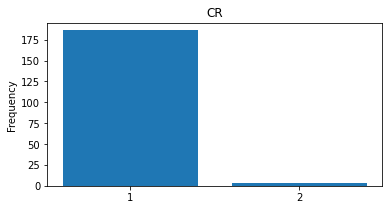

CR: 
 1    186
2      3
Name: CR, dtype: int64


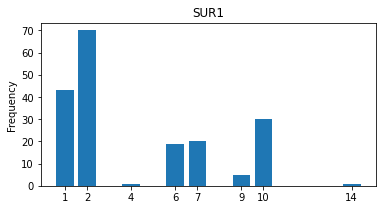

SUR1: 
 2     70
1     43
10    30
7     20
6     19
9      5
14     1
4      1
Name: SUR1, dtype: int64


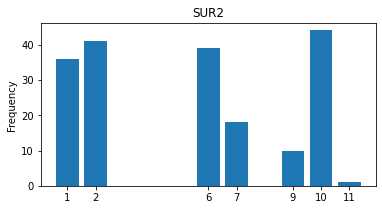

SUR2: 
 10    44
2     41
6     39
1     36
7     18
9     10
11     1
Name: SUR2, dtype: int64


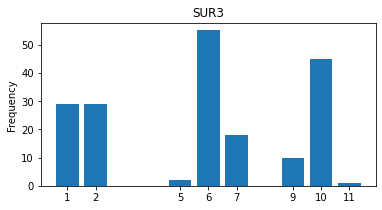

SUR3: 
 6     55
10    45
2     29
1     29
7     18
9     10
5      2
11     1
Name: SUR3, dtype: int64


In [5]:
category1 = ["TR","VR", "UR", "FR", "OR", "RR", "BR", "MR", "CR","SUR1", "SUR2", "SUR3"]
for c in category1:
    bar_plot(c)

 SUR1: {1:'forest areas', 2:'meadows', 4:'gardens',
                   6:'industrial areas',10:'river valleys', 7:'orchards', 9:'roads',
                   14:'agricultural'}
                   
 SUR2: {1:'forest areas', 2:'meadows',6:'industrial areas',
                     10:'river valleys', 7:'orchards', 9:'roads',
                     11:'agricultural'}
                     
 SUR3: {1:'forest areas', 2:'meadows', 5:'parks',
                   6:'industrial areas',10:'river valleys', 7:'orchards', 9:'roads',
                   11:'agricultural'}

In [6]:
category2 = ["SUR1", "SUR2", "SUR3"]
for c in category2:
    print("{} \n".format(df2[c].value_counts()))

2     70
1     43
10    30
7     20
6     19
9      5
14     1
4      1
Name: SUR1, dtype: int64 

10    44
2     41
6     39
1     36
7     18
9     10
11     1
Name: SUR2, dtype: int64 

6     55
10    45
2     29
1     29
7     18
9     10
5      2
11     1
Name: SUR3, dtype: int64 



To estimate the number of species we must take the total number of frog species

In [7]:
df2['Species count'] = df2['Green frogs']+ df2['Brown frogs'] + df2['Common toad']+df2['Fire-bellied toad']+df2['Tree frog'] + df2['Common newt'] + df2['Great crested newt']

In [8]:
df2=df2.drop(['Green frogs', 'Brown frogs','Common toad','Fire-bellied toad','Tree frog','Common toad','Fire-bellied toad','Tree frog','Common newt','Great crested newt'], axis=1)

In [9]:
df2.head()

,ID,Motorway,SR,NR,TR,VR,SUR1,SUR2,SUR3,UR,FR,OR,RR,BR,MR,CR,Species count
0,1,A1,600,1,1,4,6,2,10,0,0,50,0,0,0,1,0
1,2,A1,700,1,5,1,10,6,10,3,1,75,1,1,0,1,3
2,3,A1,200,1,5,1,10,6,10,3,4,75,1,1,0,1,3
3,4,A1,300,1,5,0,6,10,2,3,4,25,0,0,0,1,1
4,5,A1,600,2,1,4,10,2,6,0,0,99,0,5,0,1,5


The relationship between the number of species and all other parameters.

In [10]:
df2[["SR","Species count"]].groupby(["SR"], as_index = False).mean().sort_values(by="Species count",ascending = False)

,SR,Species count
65,500000,7.000
57,29000,7.000
3,150,7.000
5,250,7.000
61,50000,7.000
...,...,...
32,3300,2.000
33,3400,2.000
2,100,1.875
26,2100,1.000


In [11]:
df2[["NR","Species count"]].groupby(["NR"], as_index = False).mean().sort_values(by="Species count",ascending = False)

,NR,Species count
7,9,7.000000
8,10,7.000000
9,12,6.000000
2,3,4.571429
3,4,4.250000
6,7,4.000000
1,2,3.700000
0,1,2.871622
4,5,2.666667
5,6,2.666667


7: 'Garden reservoirs' equals the average of the species = 7, but we only have one garden reservoir so we can't say the garden is the best reservoir (NR)

In [12]:
df2[["TR","Species count"]].groupby(["TR"], as_index = False).mean().sort_values(by="Species count",ascending = False)

,TR,Species count
3,7,7.000000
0,1,3.689655
4,11,3.250000
6,14,2.900000
1,2,2.250000
2,5,2.166667
5,12,2.086957
7,15,1.473684


In [13]:
df2[["RR","Species count"]].groupby(["RR"], as_index = False).mean().sort_values(by="Species count",ascending = False)

,RR,Species count
5,10,3.500000
3,5,3.309524
1,1,3.180000
2,2,3.051282
0,0,2.936170
4,9,2.714286


In [14]:
df2[["BR","Species count"]].groupby(["BR"], as_index = False).mean().sort_values(by="Species count",ascending = False)

,BR,Species count
5,10,3.666667
2,2,3.344828
3,5,3.108696
0,0,3.102564
1,1,3.016129
4,9,2.571429


In [15]:
def detect_outliers(df2,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df2[c],25)
        # 3rd quartile
        Q3 = np.percentile(df2[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df2[(df2[c] < Q1 - outlier_step) | (df2[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

We dont have a outliers and missing value

In [16]:
df2.loc[detect_outliers(df2,["TR","VR","UR","FR","OR","RR","BR","CR"])]

,ID,Motorway,SR,NR,TR,VR,SUR1,SUR2,SUR3,UR,FR,OR,RR,BR,MR,CR,Species count


In [17]:
df2.isnull().sum()

ID               0
Motorway         0
SR               0
NR               0
TR               0
VR               0
SUR1             0
SUR2             0
SUR3             0
UR               0
FR               0
OR               0
RR               0
BR               0
MR               0
CR               0
Species count    0
dtype: int64

Here I copied df2 because I'm gonna use df4 for "label encoding"

In [18]:
df4=df2.copy()

Next, if you take a look at the values contained within df2['TR'], you'll notice that it contains numerically-encoded categorical data. If we head over to the column descriptions on the Amphibian Dataset page, it says that:

1 = "natural reservoirs", 2 = "recently formed", 5 = "technological", 7 = "garden", 11 = "trenches", 12 = "wet meadows", 14 = "river valleys", 15 = "small watercourses".

We'll relabel our data so that the values in df2['TR'] are more descriptive of what's really contained within it. And for every categorical data we're gonna make same thing.

In [19]:
df2["TR"].value_counts()

1     116
12     23
15     19
5      12
14     10
11      4
2       4
7       1
Name: TR, dtype: int64

In [20]:
df2['TR'].replace({1:'natural reservoirs', 2:'recently formed', 5:'technological',
                   7:'garden',11:'trenches', 12:'wet meadows', 14:'river valleys',
                   15:'small watercourses'}, inplace=True)

In [21]:
df2['VR'].replace({0:'no vegetation', 1:'patches at the edges', 2:'heavily overgrown',
                   3:'some part devoid of vegetation',4:'reservoirs completely overgrown'}, inplace=True)

In [22]:
df2["SUR3"].value_counts()

6     55
10    45
2     29
1     29
7     18
9     10
5      2
11     1
Name: SUR3, dtype: int64

In [23]:
df2['SUR1'].replace({1:'forest areas', 2:'meadows', 4:'gardens',
                   6:'industrial areas',10:'river valleys', 7:'orchards', 9:'roads',
                   14:'agricultural'}, inplace=True)

In [24]:
df2['SUR2'].replace({1:'forest areas', 2:'meadows',6:'industrial areas',
                     10:'river valleys', 7:'orchards', 9:'roads',
                     11:'agricultural'}, inplace=True)

In [25]:
df2['SUR3'].replace({1:'forest areas', 2:'meadows', 5:'parks',
                   6:'industrial areas',10:'river valleys', 7:'orchards', 9:'roads',
                   11:'agricultural'}, inplace=True)

In [26]:
df2["UR"].value_counts()

0    130
3     50
1      9
Name: UR, dtype: int64

In [27]:
df2['UR'].replace({0:'unused', 1:'scenic', 3:'technological'}, inplace=True)

In [28]:
df2["FR"].value_counts()

0    125
3     18
1     16
4     15
2     15
Name: FR, dtype: int64

In [29]:
df2['FR'].replace({0:'lack', 1:'intense fishing', 2:'breeding reservoirs',3:'remove',4:'remove'}, inplace=True)

In [30]:
df2["OR"].value_counts()

100    141
75      22
50      16
25       7
99       2
80       1
Name: OR, dtype: int64

In [31]:
df2['OR'].replace({25:'poor access', 50:'low access', 75:'medium access',100:'large access',99:'remove',80:'remove'}, inplace=True)

In [32]:
df2["RR"].value_counts()

1     50
0     47
5     42
2     39
9      7
10     4
Name: RR, dtype: int64

In [33]:
df2['RR'].replace({0:'<50 m', 1:'50-100 m', 2:'100-200 m',5:'200-500 m',9:'500-1000 m',10:'>10000'}, inplace=True)

In [34]:
df2["BR"].value_counts()

1     62
5     46
0     39
2     29
9      7
10     6
Name: BR, dtype: int64

In [35]:
df2['BR'].replace({0:'<50 m', 1:'50-100 m', 2:'100-200 m',5:'200-500 m',9:'500-1000 m',10:'>10000'}, inplace=True)

In [36]:
df2["MR"].value_counts()

0    184
2      4
1      1
Name: MR, dtype: int64

In [37]:
df2['MR'].replace({0:'Clean', 1:'slightly littered', 2:'heavily littered'}, inplace=True)

In [38]:
df2["CR"].value_counts()

1    186
2      3
Name: CR, dtype: int64

In [39]:
df2['CR'].replace({1:'Natural', 2:'Concrete'}, inplace=True)

"get dummies" converts categorical data into columns containing values 0 and 1. (One-Hot Encoding)

In [40]:
df2 = pd.get_dummies(df2)

In [41]:
df2.head()

,ID,SR,NR,Species count,Motorway_A1,Motorway_S52,TR_garden,TR_natural reservoirs,TR_recently formed,TR_river valleys,...,BR_200-500 m,BR_50-100 m,BR_500-1000 m,BR_<50 m,BR_>10000,MR_Clean,MR_heavily littered,MR_slightly littered,CR_Concrete,CR_Natural
0,1,600,1,0,1,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,1
1,2,700,1,3,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
2,3,200,1,3,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,4,300,1,1,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
4,5,600,2,5,1,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,1


Standard scaler is a good way to make sure that all of the numerical variables are on roughly the same scale that the categorical variables are on. We'll split our dataframe into two other dataframes: numerical and categorical.

In [42]:
numerical = df2[["SR","NR","Species count"]]

In [43]:
categorical=df2.drop(["SR","ID","NR","Species count"],axis=1)

In [44]:
scaler = StandardScaler()
numerical = pd.DataFrame(scaler.fit_transform(numerical))

In [45]:
numerical.columns = ["SR","NR","Species count"]

In [46]:
df3 = pd.concat([numerical, categorical], axis=1, join='inner')

In [47]:
df3.head()

,SR,NR,Species count,Motorway_A1,Motorway_S52,TR_garden,TR_natural reservoirs,TR_recently formed,TR_river valleys,TR_small watercourses,...,BR_200-500 m,BR_50-100 m,BR_500-1000 m,BR_<50 m,BR_>10000,MR_Clean,MR_heavily littered,MR_slightly littered,CR_Concrete,CR_Natural
0,-0.195806,-0.367544,-1.644217,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1,-0.193638,-0.367544,-0.058722,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
2,-0.204477,-0.367544,-0.058722,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,-0.202309,-0.367544,-1.115718,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
4,-0.195806,0.281669,0.998274,1,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,1


In [48]:
binary_data=df3.loc[:,'TR_garden':'CR_Natural']

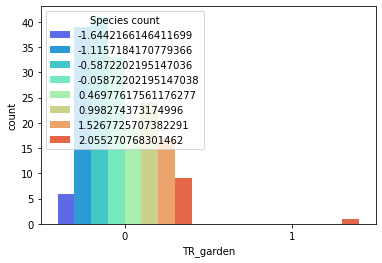

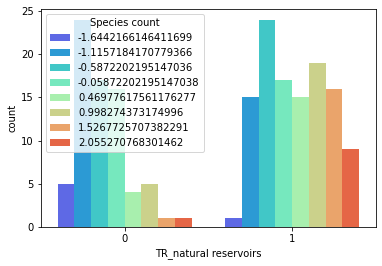

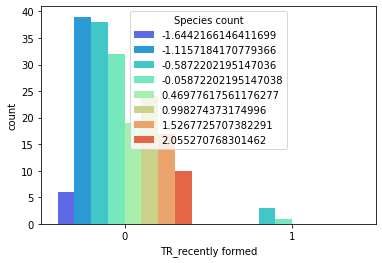

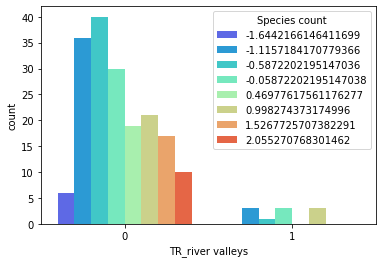

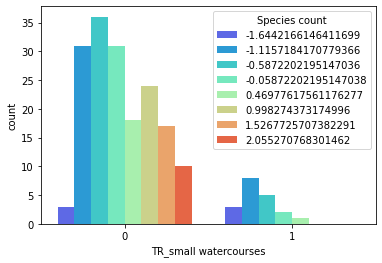

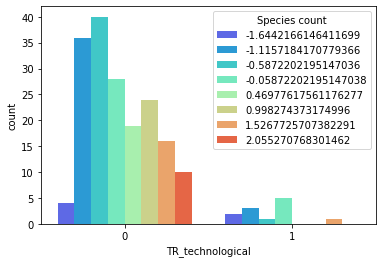

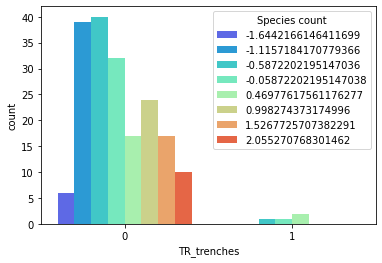

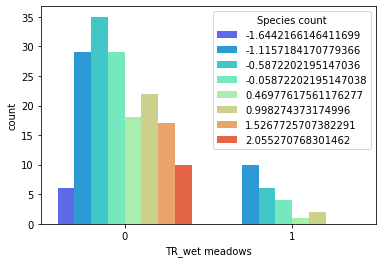

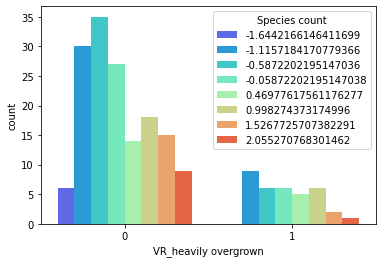

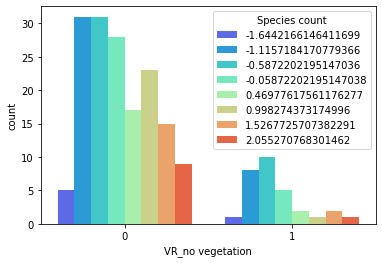

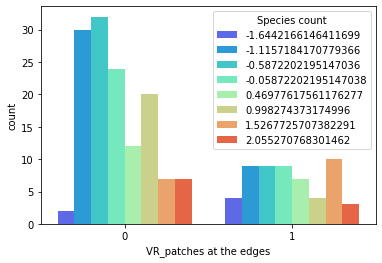

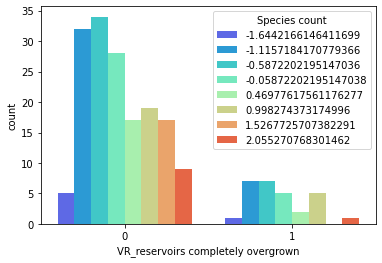

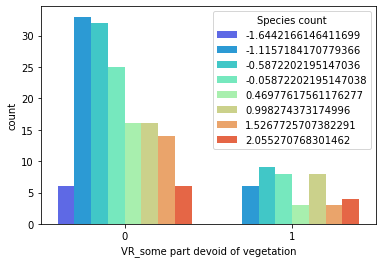

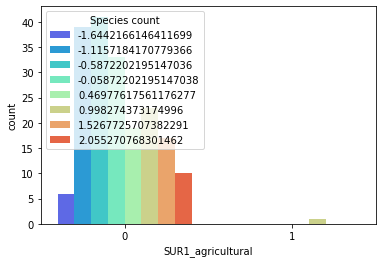

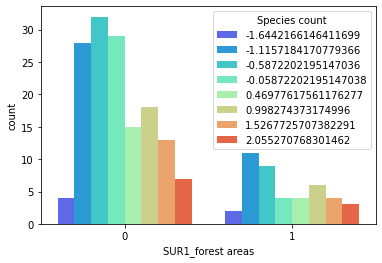

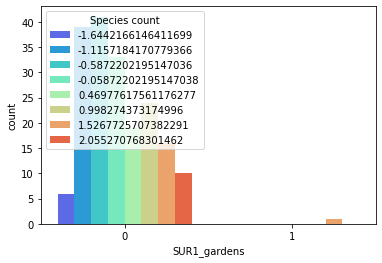

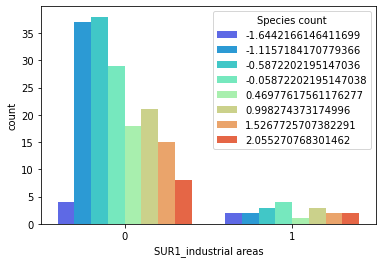

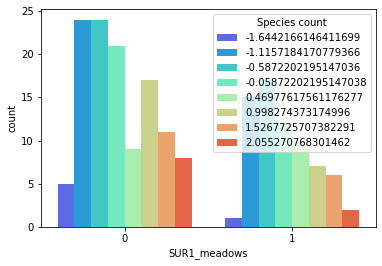

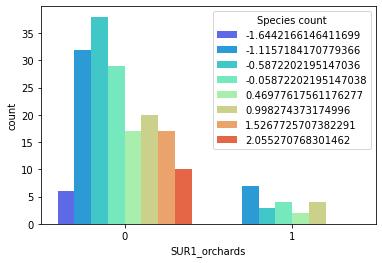

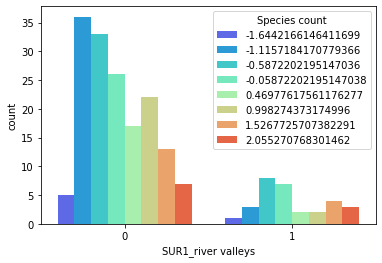

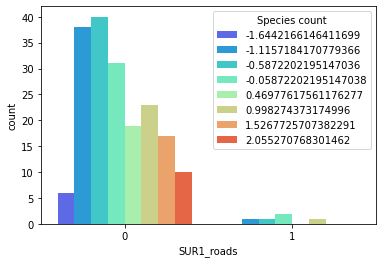

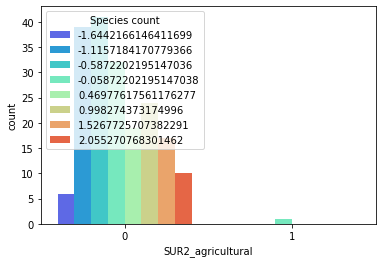

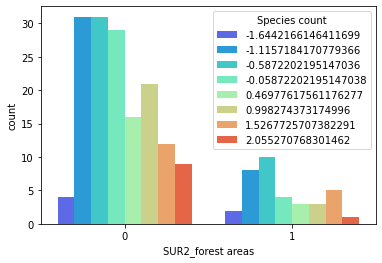

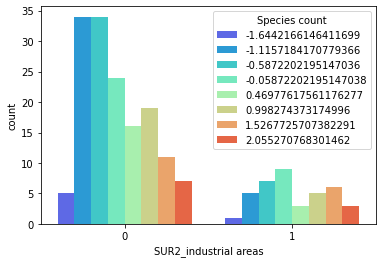

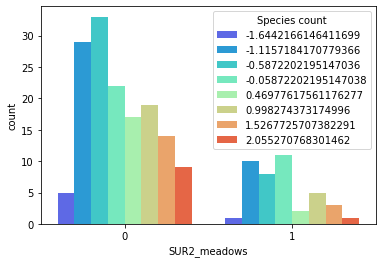

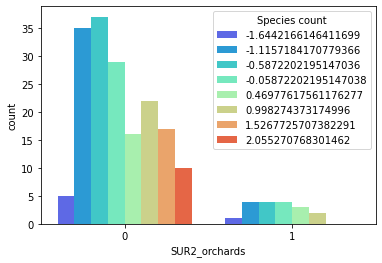

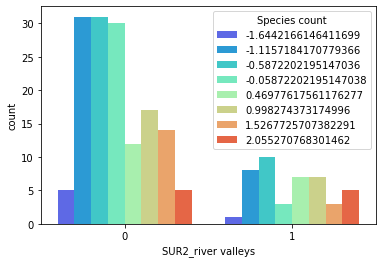

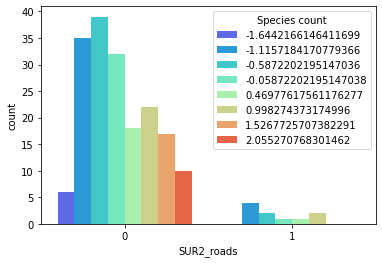

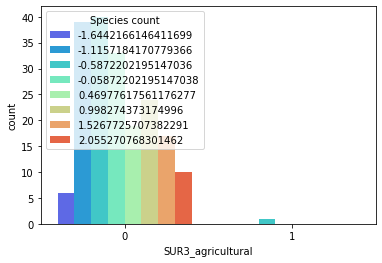

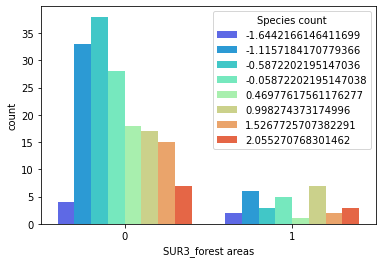

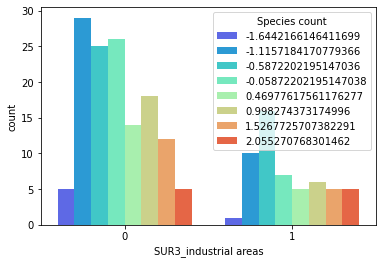

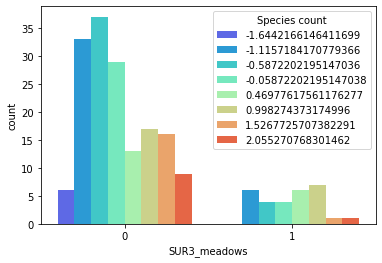

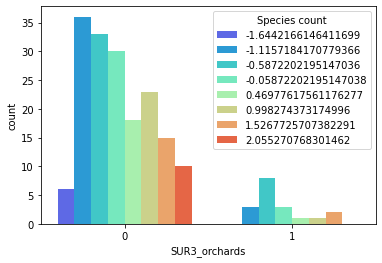

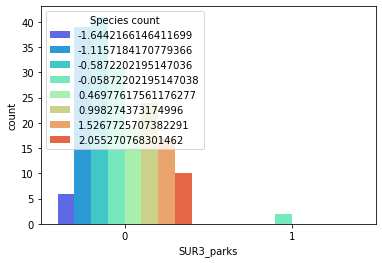

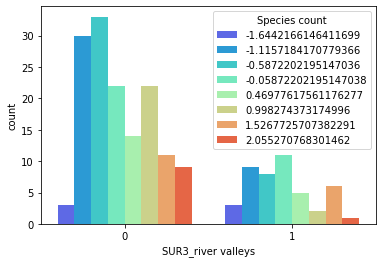

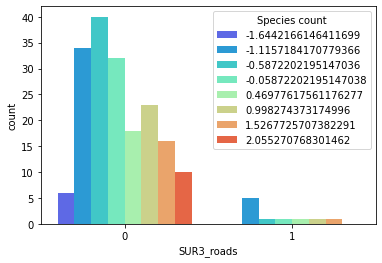

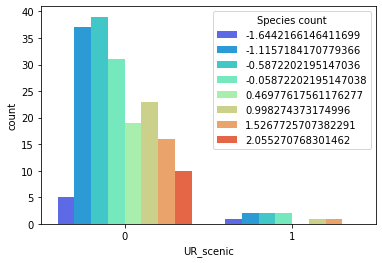

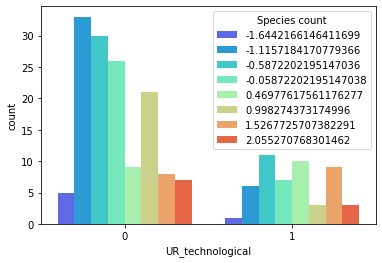

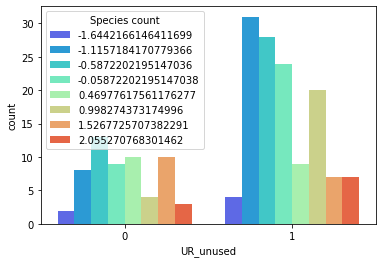

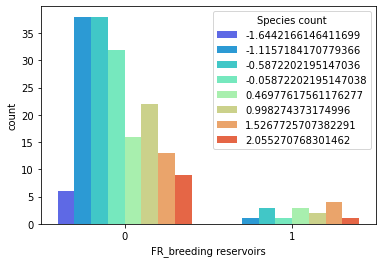

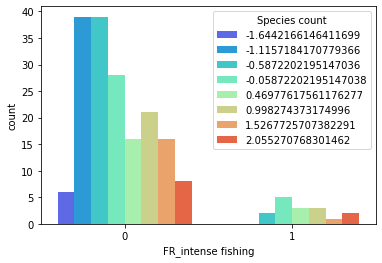

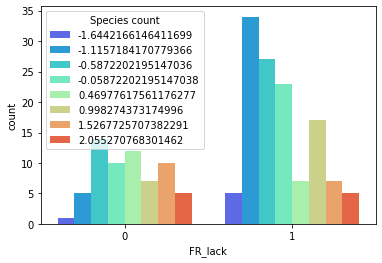

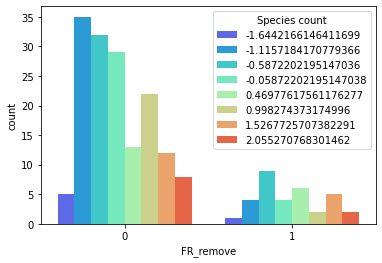

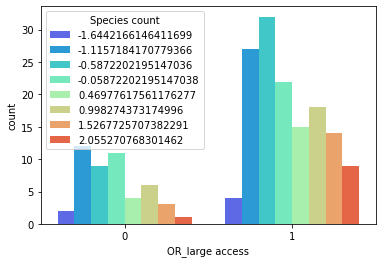

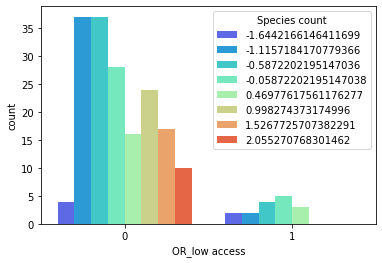

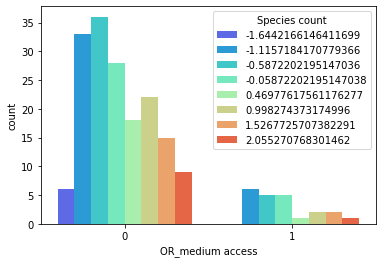

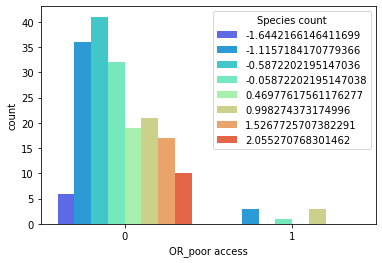

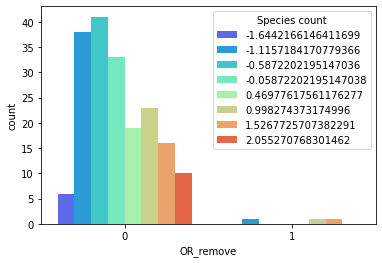

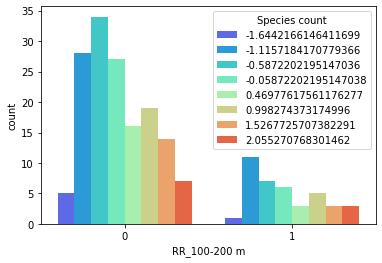

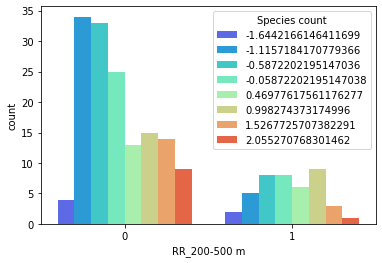

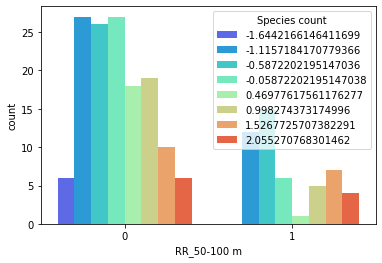

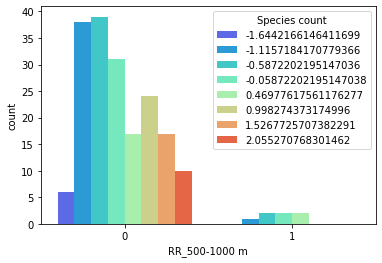

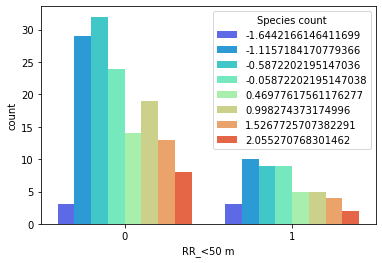

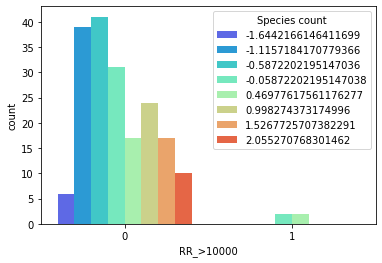

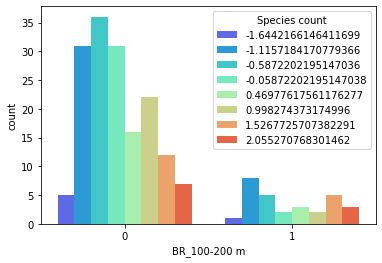

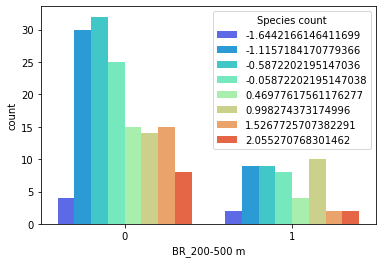

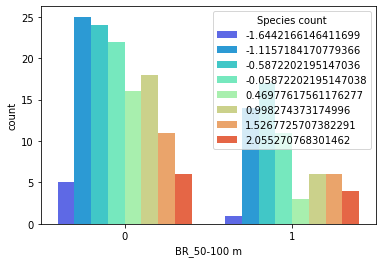

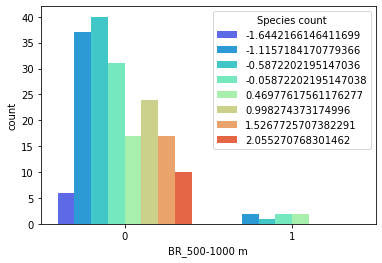

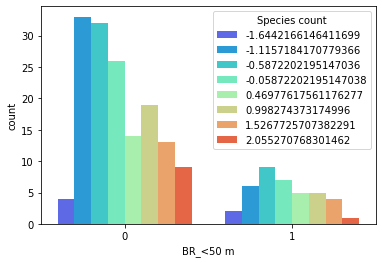

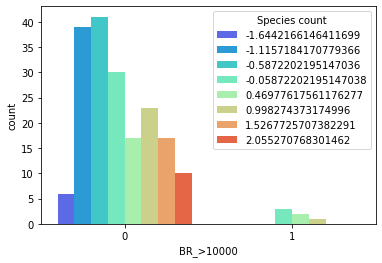

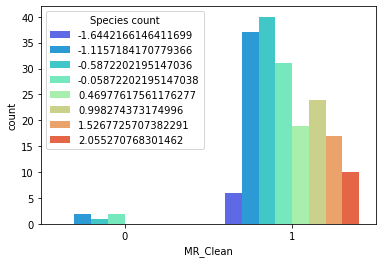

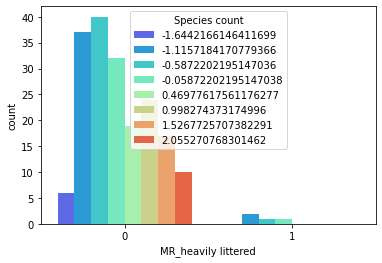

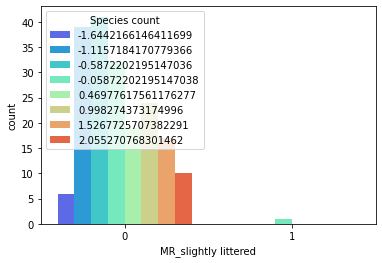

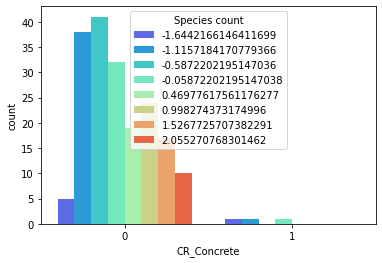

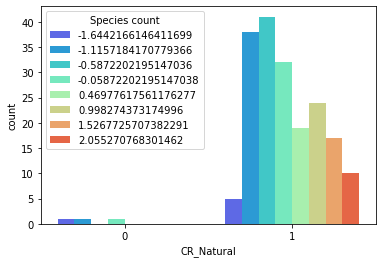

CPU times: user 14.7 s, sys: 467 ms, total: 15.2 s
Wall time: 15.1 s


In [49]:
%%time
for i, col in enumerate(binary_data.columns):
    plt.figure(i,figsize=(6,4))
    sns.countplot(x=col, hue=df3['Species count'] ,data=df3, palette="rainbow")
    plt.show()

In [50]:
data=df4.drop(["ID"],axis=1)

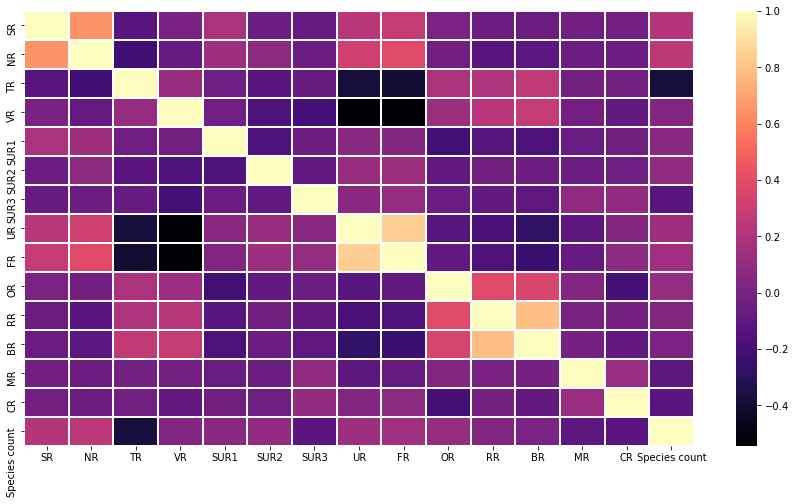

In [51]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),cmap='magma',linecolor='white',linewidths=1,annot=False)

In [52]:
df3=df3.drop(["TR_garden","Motorway_A1","Motorway_S52","FR_remove","OR_remove"],axis=1)

In [53]:
y=df3['Species count']
x=df3.drop(["Species count"],axis=1)
X=pd.DataFrame(x)

<a id = "4" ></a><br>
# Random Forest With One-Hot Encoding

In [54]:
from sklearn.ensemble import RandomForestRegressor

In [55]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [56]:
rf=RandomForestRegressor(n_estimators=100,max_depth=3,random_state=42)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=3, random_state=42)

In [57]:
mae = mean_absolute_error(rf.predict(X_test),y_test)
mse = mean_squared_error(rf.predict(X_test),y_test)
rmse = np.sqrt(mse)

print("mean absolute error: %.2f" % mae)
print("mean squared error: %.2f" % mse)
print("root mean squared error: %.2f" % rmse)

mean absolute error: 0.76
mean squared error: 0.80
root mean squared error: 0.89


pip install pydotplus

In [58]:
pip install pydotplus

     |████████████████████████████████| 278 kB 878 kB/s eta 0:00:01
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24566 sha256=a8db36ce2e333204ea1c8a153438a63513e52c7714fcf75f399d3df1f7dafb3f
  Stored in directory: /root/.cache/pip/wheels/1e/7b/04/7387cf6cc9e48b4a96e361b0be812f0708b394b821bf8c9c50
Successfully built pydotplus
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [59]:
import pydotplus

In [60]:
from ipywidgets import Image
from io import StringIO
import graphviz
from sklearn.tree import export_graphviz

In [61]:
d_tree99 = rf.estimators_[99]
dot_data = StringIO()
export_graphviz(d_tree99, feature_names = X.columns,
               out_file = dot_data, filled = True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(value = graph.create_png())

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x04\xe3\x00\x00\x01\xf1\x08\x06\x00\x00\x00/>x\xea\x…

Model tuning
* This section finds the parameters that gives the highest accuracy and performs the fit process again.

In [62]:
rf_params = {"max_depth":[2,5,8,10],
             "max_features":[2,5,8],
             "n_estimators":[10,500,1000],
             "min_samples_split":[2,5,10]}

In [63]:
rf_model = RandomForestRegressor()
rf_cv_model = GridSearchCV(rf_model,
                        rf_params,
                        cv=10,
                        n_jobs=-1,
                        verbose=2)

In [64]:
rf_cv_model.fit(X_train,y_train)
print("Best parameters: " + str(rf_cv_model.best_params_))

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  6.6min


Best parameters: {'max_depth': 8, 'max_features': 8, 'min_samples_split': 10, 'n_estimators': 10}


[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  7.2min finished


Fit process is repeated with the best parameters

In [65]:
rf_tuned = RandomForestRegressor(max_depth=8,
                                  max_features=5,
                                  min_samples_split=5,
                                  n_estimators=10)
rf_tuned.fit(X_train,y_train)

RandomForestRegressor(max_depth=8, max_features=5, min_samples_split=5,
                      n_estimators=10)

In [66]:
mae = mean_absolute_error(rf.predict(X_test),y_test)
mse = mean_squared_error(rf.predict(X_test),y_test)
rmse = np.sqrt(mse)

print("mean absolute error: %.2f" % mae)
print("mean squared error: %.2f" % mse)
print("root mean squared error: %.2f" % rmse)

mean absolute error: 0.76
mean squared error: 0.80
root mean squared error: 0.89


It is ranked according to the highest effect on the number of species, that is, the high degree of importance.

In [67]:
Importance=pd.DataFrame({"Importance":rf_tuned.feature_importances_*100},
                       index=X_train.columns)

Text(0.5, 0, 'Importance level of values')

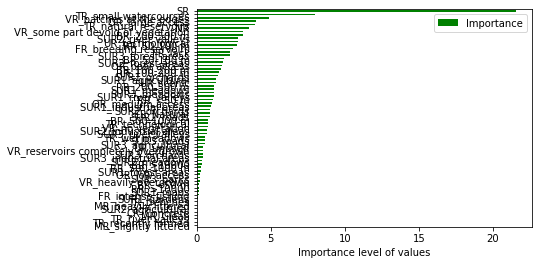

In [68]:
Importance.sort_values(by="Importance",
                      axis=0,
                      ascending=True).plot(kind="barh",color="green")
plt.xlabel("Importance level of values")

In [69]:
## from sklearn.metrics import r2_score
print(r2_score(y_test,rf_tuned.predict(X_test)))

0.14974408687618557


In [70]:
import statsmodels.api as sm

In [71]:
model=sm.OLS(rf_tuned.predict(X_test),X_test)
model.fit().summary()

/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/opt/conda/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/opt/conda/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/opt/conda/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     2.360
Date:                Sun, 10 Jan 2021   Prob (F-statistic):             0.0843
Time:                        10:15:28   Log-Likelihood:                 38.886
No. Observations:                  57   AIC:                             18.23
Df Residuals:                       9   BIC:                             116.3
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
SR                                    -0.2497      0.552     -0.452      0.662      -1.499       0.999
NR                                     0.4508      0.347      1.299      0.226      -0.334       1.236
TR_natural reservoirs                  0.7254      0.392      1.851      0.097      -0.161       1.612
TR_recently formed                    -0.0100      0.562     -0.018      0.986      -1.282       1.262
TR_river valleys                       0.3013      0.624      0.483      0.641      -1.111       1.713
TR_small watercourses                 -0.4107      0.477     -0.862      0.411      -1.489       0.667
TR_technological                      -1.0517      1.663     -0.632      0.543      -4.814       2.710
TR_trenches                            0.2678      0.514      0.521      0.615      -0.896       1.431
TR_wet meadows                         0.2141      0.552      0.388      0.707      -1.035       1.463
VR_heavily overgrown                  -0.3154      0.324     -0.974      0.355      -1.048       0.417
VR_no vegetation                      -0.6201      0.378     -1.642      0.135      -1.475       0.234
VR_patches at the edges                0.1302      0.343      0.380      0.713      -0.645       0.905
VR_reservoirs completely overgrown     0.2922      0.336      0.870      0.407      -0.467       1.052
VR_some part devoid of vegetation      0.5492      0.230      2.386      0.041       0.028       1.070
SUR1_agricultural                   2.611e-15   3.93e-15      0.665      0.523   -6.27e-15    1.15e-14
SUR1_forest areas                     -0.0640      0.221     -0.289      0.779      -0.564       0.436
SUR1_gardens                        1.158e-15   7.19e-16      1.611      0.142   -4.68e-16    2.79e-15
SUR1_industrial areas                  0.3722      0.324      1.147      0.281      -0.362       1.106
SUR1_meadows                          -0.0277      0.175     -0.158      0.878      -0.425       0.369
SUR1_orchards                          0.0843      0.278      0.303      0.769      -0.544       0.713
SUR1_river valleys                     0.1483      0.274      0.541      0.602      -0.472       0.769
SUR1_roads                            -0.4770      0.471     -1.013      0.338      -1.542       0.588
SUR2_agricultural                  -9.539e-18    1.2e-15     -0.008      0.994   -2.73e-15    2.71e-15
SUR2_forest areas                      0.2579      0.221      1.166      0.274      -0.242       0.758
SUR2_industrial areas                  0.0375      0.304      0.123      0.905      -0.651       0.726
SUR2_meadows                           0.0252      0.214      0.118      0.909      -0.458       0.508
SUR2_orchards                          0.1415      0.235      0.603      0.562      -0.389      

<a id = "5" ></a><br>
# Random Forest Regressor With Label Encoding

In [72]:
df4.head()

,ID,Motorway,SR,NR,TR,VR,SUR1,SUR2,SUR3,UR,FR,OR,RR,BR,MR,CR,Species count
0,1,A1,600,1,1,4,6,2,10,0,0,50,0,0,0,1,0
1,2,A1,700,1,5,1,10,6,10,3,1,75,1,1,0,1,3
2,3,A1,200,1,5,1,10,6,10,3,4,75,1,1,0,1,3
3,4,A1,300,1,5,0,6,10,2,3,4,25,0,0,0,1,1
4,5,A1,600,2,1,4,10,2,6,0,0,99,0,5,0,1,5


In [73]:
k=df4["Species count"]

In [74]:
m=df4.drop(["Species count","ID","Motorway"],axis=1)

In [75]:
m.head()

,SR,NR,TR,VR,SUR1,SUR2,SUR3,UR,FR,OR,RR,BR,MR,CR
0,600,1,1,4,6,2,10,0,0,50,0,0,0,1
1,700,1,5,1,10,6,10,3,1,75,1,1,0,1
2,200,1,5,1,10,6,10,3,4,75,1,1,0,1
3,300,1,5,0,6,10,2,3,4,25,0,0,0,1
4,600,2,1,4,10,2,6,0,0,99,0,5,0,1


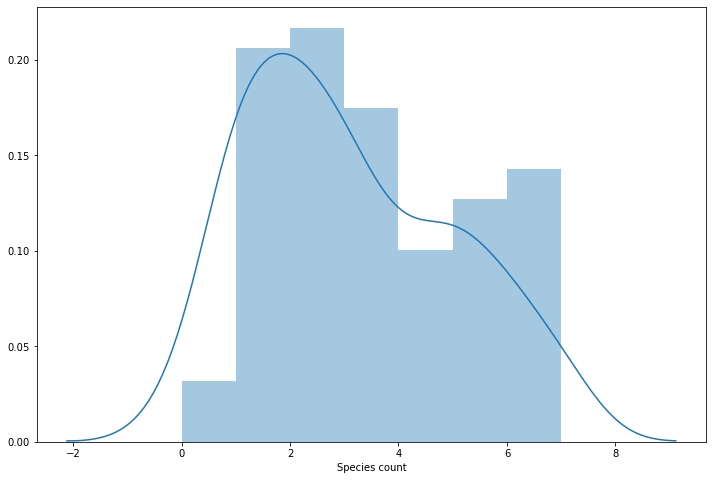

In [76]:
plt.figure(figsize=(12,8))
sns.distplot(k)
plt.show()

In [77]:
m_train, m_test, k_train, k_test=train_test_split(m,k,test_size=0.3,random_state=42)

In [78]:
rf2=RandomForestRegressor(n_estimators=100,max_depth=3,random_state=42)
rf2.fit(m_train,k_train)

RandomForestRegressor(max_depth=3, random_state=42)

In [79]:
mae = mean_absolute_error(rf2.predict(m_test),k_test)
mse = mean_squared_error(rf2.predict(m_test),k_test)
rmse = np.sqrt(mse)

print("mean absolute error: %.2f" % mae)
print("mean squared error: %.2f" % mse)
print("root mean squared error: %.2f" % rmse)

mean absolute error: 1.42
mean squared error: 2.81
root mean squared error: 1.68


In [80]:
d_tree99 = rf2.estimators_[99]
dot_data = StringIO()
export_graphviz(d_tree99, feature_names = m.columns,
               out_file = dot_data, filled = True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(value = graph.create_png())

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x04\xb0\x00\x00\x01\xf1\x08\x02\x00\x00\x00\xf2\x7f\…

In [81]:
rf2_params = {"max_depth":[2,5,8,10],
             "max_features":[2,5,8],
             "n_estimators":[10,500,1000],
             "min_samples_split":[2,5,10]}

In [82]:
rf2_model = RandomForestRegressor()
rf2_cv_model = GridSearchCV(rf2_model,
                        rf2_params,
                        cv=10,
                        n_jobs=-1,
                        verbose=2)

In [83]:
rf2_cv_model.fit(m_train,k_train)
print("Best parameters: " + str(rf2_cv_model.best_params_))

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done 186 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 389 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 1037 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  7.1min finished


Best parameters: {'max_depth': 10, 'max_features': 2, 'min_samples_split': 5, 'n_estimators': 500}


In [84]:
rf2_tuned = RandomForestRegressor(max_depth=10,
                                  max_features=8,
                                  min_samples_split=10,
                                  n_estimators=1000)
rf2_tuned.fit(m_train,k_train)

RandomForestRegressor(max_depth=10, max_features=8, min_samples_split=10,
                      n_estimators=1000)

In [85]:
mae=mean_absolute_error(rf2_tuned.predict(m_test),k_test)
mse=mean_squared_error(rf2_tuned.predict(m_test),k_test)
rmse=np.sqrt(mse)

print("mean_absolute_error: %.2f"%mae)
print("mean squared error: %.2f" %mse)
print("root mean squared error: %.2f" %rmse)

mean_absolute_error: 1.39
mean squared error: 2.76
root mean squared error: 1.66


In [86]:
m_test.head()

,SR,NR,TR,VR,SUR1,SUR2,SUR3,UR,FR,OR,RR,BR,MR,CR
184,2300,1,12,3,2,2,1,0,0,75,2,1,0,1
163,2300,1,1,1,2,6,10,3,3,50,1,0,0,1
18,1600,3,1,0,2,6,2,3,1,75,2,1,0,1
15,30000,1,1,3,1,1,1,0,0,100,2,10,0,1
67,200,1,12,4,7,2,6,0,0,100,0,0,0,1


In [87]:
from sklearn.metrics import r2_score
print(r2_score(k_test,rf2_tuned.predict(m_test)))

0.1477573761459503


In [88]:
Importance=pd.DataFrame({"Importance":rf2_tuned.feature_importances_*100},
                       index=m_train.columns)

Text(0.5, 0, 'Importance level of values')

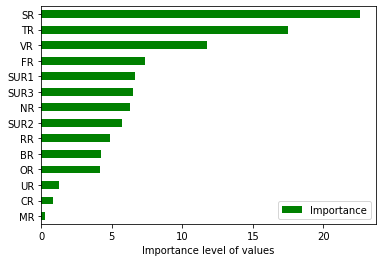

In [89]:
Importance.sort_values(by="Importance",
                      axis=0,
                      ascending=True).plot(kind="barh",color="green")
plt.xlabel("Importance level of values")

In [90]:
model2=sm.OLS(rf2_tuned.predict(m_test),m_test)
model2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     12.94
Date:                Sun, 10 Jan 2021   Prob (F-statistic):           6.63e-11
Time:                        10:22:40   Log-Likelihood:                -23.009
No. Observations:                  57   AIC:                             74.02
Df Residuals:                      43   BIC:                             102.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SR          8.574e-06   6.33e-06      1.354      0.183    -4.2e-06    2.13e-05
NR             0.0656      0.079      0.827      0.413      -0.094       0.226
TR            -0.1148      0.012     -9.585      0.000      -0.139      -0.091
VR             0.2296      0.058      3.936      0.000       0.112       0.347
SUR1          -0.0049      0.020     -0.243      0.809      -0.046       0.036
SUR2          -0.0123      0.020     -0.617      0.541      -0.052       0.028
SUR3          -0.0443      0.020     -2.163      0.036      -0.086      -0.003
UR             0.0028      0.127      0.022      0.983      -0.254       0.259
FR             0.1427      0.128      1.114      0.272      -0.116       0.401
OR            -0.0036      0.004     -0.940      0.352      -0.011       0.004
RR             0.0347      0.039      0.888      0.380      -0.044       0.114
BR             0.0304      0.033      0.932      0.357      -0.035       0.096
MR            -0.3143      0.159     -1.979      0.054      -0.635       0.006
CR             3.5148      0.509      6.909      0.000       2.489       4.541
==============================================================================
Omnibus:                        0.022   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.989   Jarque-Bera (JB):                0.128
Skew:                          -0.044   Prob(JB):                        0.938
Kurtosis:                       2.785   Cond. No.                     1.21e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Gradient Boosting With One Hot Encoding

In [91]:
from sklearn.ensemble import GradientBoostingRegressor

In [92]:
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [93]:
y_pred = gbm_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.9211485553126078

In [94]:
gbm_params = {
    "learning_rate": [0.01, 0.1, 0.2],
    'max_depth': [3,5,8,50,100],
    'n_estimators': [200, 500, 1000, 2000],
    'subsample': [1, 0.5, 0.75],
}

In [95]:
gbm = GradientBoostingRegressor()
gbm_cv_model = GridSearchCV(gbm, gbm_params, cv=10, n_jobs = -1, verbose =2)
gbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 190 tasks      | elapsed:   34.2s
[Parallel(n_jobs=-1)]: Done 393 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 676 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 1041 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 1486 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  9.8min finished


GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 8, 50, 100],
                         'n_estimators': [200, 500, 1000, 2000],
                         'subsample': [1, 0.5, 0.75]},
             verbose=2)

In [96]:
gbm_cv_model.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.5}

In [97]:
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.01,
                                      max_depth = 5,
                                      n_estimators = 200,
                                      subsample = 0.5)
gbm_tuned = gbm_tuned.fit(X_train, y_train)

In [98]:
y_pred = gbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.8758197381264089

In [126]:
Importance=pd.DataFrame({"Importance":gbm_tuned.feature_importances_*100},
                       index= X_train.columns)

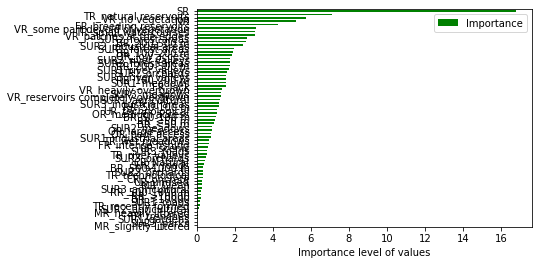

,Importance
SR,16.773179
NR,5.244645
TR_natural reservoirs,7.135372
TR_recently formed,0.163711
TR_river valleys,0.526592
...,...
MR_Clean,0.299532
MR_heavily littered,0.082711
MR_slightly littered,0.018399
CR_Concrete,0.323181


In [130]:
Importance.sort_values(by="Importance",
                      axis=0,
                      ascending=True).plot(kind="barh",color="green")
plt.xlabel("Importance level of values")
plt.show()
df5=pd.DataFrame(Importance)
df5.head(64)

In [150]:
df5.iloc[40:64]

,Importance
FR_breeding reservoirs,4.266049
FR_intense fishing,0.643789
FR_lack,1.520491
OR_large access,0.794994
OR_low access,1.837009
OR_medium access,1.068677
OR_poor access,0.752814
RR_100-200 m,1.550429
RR_200-500 m,1.728163
RR_50-100 m,1.160696


In [101]:
model=sm.OLS(gbm_tuned.predict(X_test),X_test)
model.fit().summary()

/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/opt/conda/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/opt/conda/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/opt/conda/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     6.201
Date:                Sun, 10 Jan 2021   Prob (F-statistic):            0.00311
Time:                        10:32:31   Log-Likelihood:                 66.930
No. Observations:                  57   AIC:                            -37.86
Df Residuals:                       9   BIC:                             60.21
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
SR                                     0.0436      0.338      0.129      0.900      -0.720       0.807
NR                                     0.1522      0.212      0.717      0.491      -0.328       0.632
TR_natural reservoirs                  0.2939      0.240      1.227      0.251      -0.248       0.836
TR_recently formed                     0.1064      0.344      0.309      0.764      -0.672       0.884
TR_river valleys                      -0.4464      0.382     -1.169      0.272      -1.310       0.417
TR_small watercourses                 -0.7841      0.291     -2.691      0.025      -1.443      -0.125
TR_technological                       1.2474      1.017      1.227      0.251      -1.053       3.548
TR_trenches                            0.0184      0.314      0.059      0.955      -0.693       0.730
TR_wet meadows                        -0.4949      0.338     -1.466      0.177      -1.258       0.269
VR_heavily overgrown                  -0.1117      0.198     -0.564      0.586      -0.560       0.336
VR_no vegetation                      -0.6630      0.231     -2.871      0.018      -1.185      -0.141
VR_patches at the edges                0.0437      0.209      0.209      0.839      -0.430       0.518
VR_reservoirs completely overgrown     0.2951      0.205      1.438      0.184      -0.169       0.759
VR_some part devoid of vegetation      0.3766      0.141      2.676      0.025       0.058       0.695
SUR1_agricultural                  -1.943e-15    2.4e-15     -0.810      0.439   -7.37e-15    3.49e-15
SUR1_forest areas                      0.0027      0.135      0.020      0.984      -0.303       0.309
SUR1_gardens                        3.835e-16    4.4e-16      0.872      0.406   -6.11e-16    1.38e-15
SUR1_industrial areas                 -0.0818      0.198     -0.412      0.690      -0.531       0.367
SUR1_meadows                          -0.0846      0.107     -0.788      0.451      -0.327       0.158
SUR1_orchards                          0.1380      0.170      0.812      0.438      -0.246       0.522
SUR1_river valleys                     0.0866      0.168      0.517      0.618      -0.293       0.466
SUR1_roads                            -0.1202      0.288     -0.417      0.686      -0.771       0.531
SUR2_agricultural                  -2.057e-16   7.36e-16     -0.280      0.786   -1.87e-15    1.46e-15
SUR2_forest areas                     -0.0049      0.135     -0.036      0.972      -0.311       0.301
SUR2_industrial areas                 -0.1435      0.186     -0.771      0.461      -0.565       0.278
SUR2_meadows                          -0.0420      0.131     -0.322      0.755      -0.337       0.253
SUR2_orchards                         -0.0027      0.143     -0.019      0.986      -0.327      

## Gradient Boosting With Label Encoding

In [103]:
from sklearn.ensemble import GradientBoostingRegressor

In [104]:
gbm_model2 = GradientBoostingRegressor()
gbm_model2.fit(m_train, k_train)

GradientBoostingRegressor()

In [105]:
k_pred2 = gbm_model2.predict(m_test)
np.sqrt(mean_squared_error(k_test, k_pred2))

1.7067671121985801

In [106]:
gbm_params = {
    "learning_rate": [0.01, 0.1, 0.2],
    'max_depth': [3,5,8,50,100],
    'n_estimators': [200, 500, 1000, 2000],
    'subsample': [1, 0.5, 0.75],
}

In [107]:
gbm2 = GradientBoostingRegressor()
gbm_cv_model2 = GridSearchCV(gbm2, gbm_params, cv=10, n_jobs = -1, verbose =2)
gbm_cv_model2.fit(m_train, k_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  7.3min finished


GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 8, 50, 100],
                         'n_estimators': [200, 500, 1000, 2000],
                         'subsample': [1, 0.5, 0.75]},
             verbose=2)

In [108]:
gbm_cv_model2.best_params_

{'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.5}

In [109]:
gbm_tuned2 = GradientBoostingRegressor(learning_rate = 0.01,
                                      max_depth = 3,
                                      n_estimators = 200,
                                      subsample = 0.5)
gbm_tuned2 = gbm_tuned2.fit(m_train, k_train)

In [110]:
k_pred2 = gbm_tuned2.predict(m_test)
np.sqrt(mean_squared_error(k_test, k_pred2))

1.6554919195044229

In [123]:
Importance=pd.DataFrame({"Importance":gbm_tuned2.feature_importances_*100},
                       index=m_train.columns)

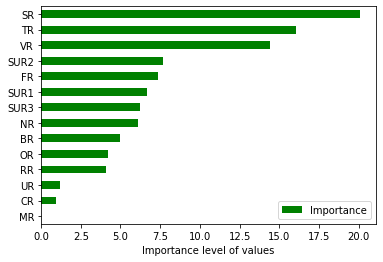

In [124]:
Importance.sort_values(by="Importance",
                      axis=0,
                      ascending=True).plot(kind="barh",color="green")
plt.xlabel("Importance level of values")
plt.show()

In [114]:
model2=sm.OLS(gbm_tuned2.predict(m_test), m_test)
model2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     13.33
Date:                Sun, 10 Jan 2021   Prob (F-statistic):           4.13e-11
Time:                        11:13:44   Log-Likelihood:                -15.437
No. Observations:                  57   AIC:                             58.87
Df Residuals:                      43   BIC:                             87.48
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SR          1.313e-05   5.55e-06      2.367      0.023    1.94e-06    2.43e-05
NR             0.0956      0.069      1.376      0.176      -0.045       0.236
TR            -0.1019      0.010     -9.710      0.000      -0.123      -0.081
VR             0.1836      0.051      3.595      0.001       0.081       0.287
SUR1          -0.0073      0.018     -0.413      0.682      -0.043       0.028
SUR2           0.0027      0.017      0.156      0.877      -0.032       0.038
SUR3          -0.0291      0.018     -1.623      0.112      -0.065       0.007
UR             0.0518      0.111      0.465      0.644      -0.173       0.277
FR             0.0206      0.112      0.183      0.855      -0.206       0.247
OR            -0.0007      0.003     -0.206      0.838      -0.008       0.006
RR             0.0513      0.034      1.499      0.141      -0.018       0.120
BR             0.0056      0.029      0.195      0.847      -0.052       0.063
MR            -0.1941      0.139     -1.396      0.170      -0.475       0.086
CR             3.1692      0.445      7.114      0.000       2.271       4.068
==============================================================================
Omnibus:                        3.228   Durbin-Watson:                   1.773
Prob(Omnibus):                  0.199   Jarque-Bera (JB):                2.272
Skew:                          -0.403   Prob(JB):                        0.321
Kurtosis:                       3.554   Cond. No.                     1.21e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## XGBoost With Label Encoding

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb = XGBRegressor().fit(m_train, k_train)

In [ ]:
k_pred = xgb.predict(m_test)
np.sqrt(mean_squared_error(k_test, k_pred))

In [ ]:
xgb

In [ ]:
xgb_grid = {
    'colsample_bytree': [0.4, 0.5, 0.6, 0.9 ,1],
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [2, 3, 4, 5, 6],
    'learning_rate': [0.1, 0.01, 0.5]
}

In [ ]:
xgb = XGBRegressor()
xgb_cv = GridSearchCV(xgb, 
                     param_grid = xgb_grid,
                     cv=10,
                     n_jobs = -1,
                     verbose = 2)
xgb_cv.fit(m_train, k_train)

In [ ]:
xgb_cv.best_params_

In [ ]:
xgb_tuned = XGBRegressor(colsample_bytree = 0.4,
                         learning_rate = 0.01,
                         max_depth = 2,
                         n_estimators = 500)
xgb_tuned = xgb_tuned.fit(m_train, k_train)

In [ ]:
k_pred = xgb_tuned.predict(m_test)
np.sqrt(mean_squared_error(k_test, k_pred))

In [ ]:
Importance=pd.DataFrame({"Importance":xgb_tuned.feature_importances_*100},
                       index = m_train.columns)

In [ ]:
Importance.sort_values(by="Importance",
                      axis=0,
                      ascending=True).plot(kind="barh",color="green")
plt.xlabel("Importance level of values")

In [ ]:
model=sm.OLS(xgb_tuned.predict(m_test), m_test)
model.fit().summary()